<a href="https://colab.research.google.com/github/Taha0229/Lego_Analysis/blob/main/LEGO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [ ]:
color_df = pd.read_csv('data/colors.csv')
print(color_df.columns)
print(color_df.shape)

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')
(135, 4)


In [ ]:
print(f"Unique colors are : {color_df['rgb'].nunique()}")
print(f"Total listed colors : {color_df['rgb'].count()}")


Unique colors are : 124
Total listed colors : 135


Find the number of transparent colours

In [ ]:
gd = color_df.groupby('is_trans')
gd.count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
is_trans = 0
is_opaque = 0
for i in color_df['is_trans']:
  if i == 'f':
    is_opaque += 1
  elif i == 't':
    is_trans += 1
print(f"transparent colors : {is_trans}")
print(f"opaque colors : {is_opaque}")


transparent colors : 28
opaque colors : 107


In [ ]:
color_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

<b><h3>Understanding LEGO Themes vs. LEGO Sets</h3><b>


Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.



<img src="https://i.imgur.com/aKcwkSx.png">



<b>A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets. </b>



The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.



<img src="https://i.imgur.com/whB1olq.png">


In [ ]:
sets_df = pd.read_csv('data/sets.csv')

In [ ]:
print(sets_df.shape)
print(sets_df.columns)

(15710, 5)
Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')


In which year were the first LEGO sets released and what were these sets called?

In [ ]:
first_year = sets_df['year'].idxmin()
first_year
fy_lego = sets_df.loc[first_year]
print(fy_lego['name'])
print(fy_lego['year'])


Extra-Large Gift Set (ABB)
1949


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
group_year = sets_df.groupby('year').count()
group_year[group_year.index == fy_lego['year']]



,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5


Find the top 5 LEGO sets with the most number of parts.

In [ ]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**The number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?**

In [ ]:
sets_by_year = group_year['name']
print(sets_by_year[sets_by_year.index == 1955])
print(sets_by_year[sets_by_year.index == 2019])
sets_by_year.tail()

year
1955    28
Name: name, dtype: int64
year
2019    840
Name: name, dtype: int64


year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, dtype: int64

In [ ]:
graph_range = (len(sets_by_year)-2)

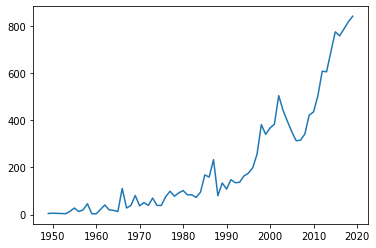

In [ ]:
plt.plot(sets_by_year.index[:graph_range], sets_by_year[:graph_range] )

### Aggregate Data

**The number of different themes shipped by year.**

In [ ]:
theme_by_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})
# theme_by_year = sets_df.groupby('year').agg({'num_parts': pd.Series.sum})
theme_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
theme_by_year.head()


,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
sets_df[sets_df['year'] == 1949]['num_parts'].sum()


498

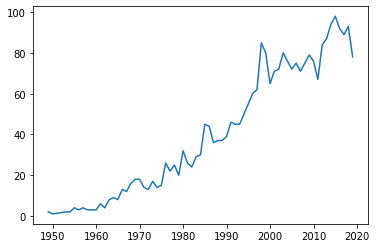

In [ ]:
plt.plot(theme_by_year.index[:-2], theme_by_year['nr_themes'][:-2])

**The number of themes released by year. Only include the full calendar years (i.e., exclude 2020 and 2021).**

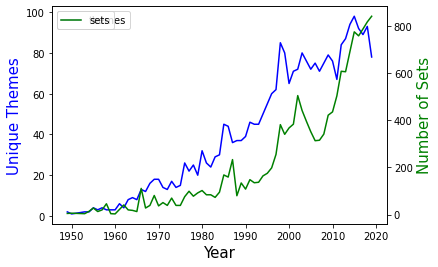

In [ ]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(theme_by_year.index[:-2], theme_by_year['nr_themes'][:-2], color='blue', label='themes')
ax2.plot(sets_by_year.index[:graph_range], sets_by_year[:graph_range], color='green',label='sets')

ax1.set_xlabel('Year', fontsize=15)
ax1.set_ylabel('Unique Themes', color='blue', fontsize=15)
ax2.set_ylabel('Number of Sets', color='green', fontsize=15)

plt.legend()
ax1.legend()

**How many parts did the average LEGO set released in 1954 compared to say, 2017?**

In [ ]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean })
parts_per_set.rename(columns={'num_parts': 'average num_parts'}, inplace=True)
parts_per_set

,average num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plot

**Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time.**

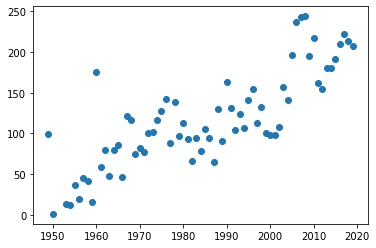

In [ ]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['average num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
sets_theme_count = sets_df['theme_id'].value_counts()
sets_theme_count.head()
sets_theme_count = pd.DataFrame({'id':sets_theme_count.index,
                                 'set_count': sets_theme_count.values})
sets_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [ ]:
themes_df = pd.read_csv('data/themes.csv')
themes_df.columns
themes_df
star_wars = themes_df[themes_df['name'] == 'Star Wars']
print(star_wars)
star_wars['id'].count()

      id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0


4

In [ ]:
num = 0
for id in star_wars['id']:
  star_wars_corres = sets_df[sets_df['theme_id'] == id]
  num += star_wars_corres.count()
  print(star_wars_corres)
print(num)

       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
           set_num                                              

In [ ]:
merged_df = pd.merge(sets_theme_count, themes_df, on='id')
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<BarContainer object of 10 artists>

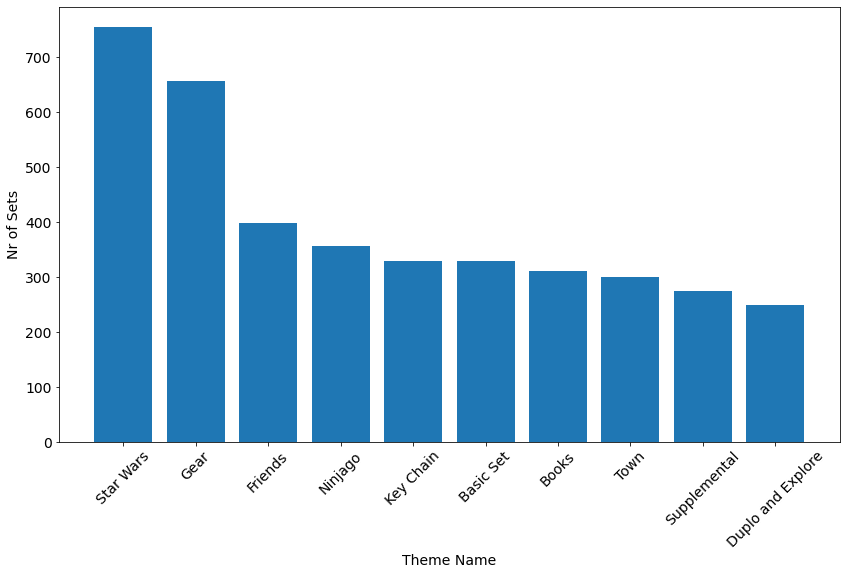

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])